In [5]:
import pandas as pd
import os

In [6]:
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# Ïã§Ï†ú TTF ÌååÏùº Í≤ΩÎ°ú (Ïòà: ÎÇòÎàîÍ≥†Îîï)
font_path = '/content/drive/MyDrive/NanumFontSetup_TTF_ALL/NanumGothic.ttf'

# Ìè∞Ìä∏ Îì±Î°ù Î∞è Ï†ÅÏö©
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

In [14]:
data_root = '/content/drive/MyDrive/data'
months = ['2019-Oct', '2019-Nov', '2019-Dec', '2020-Jan', '2020-Feb', '2020-Mar']

monthly_category_views = {}

for m in months:
    file_path = os.path.join(data_root, f"{m}.parquet")
    print(f"[{m}] ÌååÏùº Î°úÎî© Ï§ë...")

    try:
        df = pd.read_parquet(file_path)

        # view Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅ
        df_view = df[df["event_type"] == "view"]

        # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï°∞Ìöå Ïàò ÏßëÍ≥Ñ
        category_counts = df_view["category_lvl1"].value_counts()
        monthly_category_views[m] = category_counts

    except Exception as e:
        print(f"‚ö†Ô∏è {m} Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò: {e}")

[2019-Oct] ÌååÏùº Î°úÎî© Ï§ë...
[2019-Nov] ÌååÏùº Î°úÎî© Ï§ë...
[2019-Dec] ÌååÏùº Î°úÎî© Ï§ë...
[2020-Jan] ÌååÏùº Î°úÎî© Ï§ë...
[2020-Feb] ÌååÏùº Î°úÎî© Ï§ë...
[2020-Mar] ÌååÏùº Î°úÎî© Ï§ë...


In [15]:
# ÏõîÎ≥Ñ ÏßëÍ≥Ñ ‚Üí DataFrame Î≥ÄÌôò
df_monthly_views = pd.DataFrame(monthly_category_views).fillna(0).astype(int)

In [12]:
df = pd.read_parquet('/content/drive/MyDrive/data/cart_purchase_only.parquet')

 1. df
event_typeÏù¥ "purchase" ÎòêÎäî "cart"Ïù∏ 6Í∞úÏõîÏπò Ïù¥Î≤§Ìä∏ Î°úÍ∑∏

‚Üí Íµ¨Îß§ Î∞è Ïû•Î∞îÍµ¨Îãà ÌñâÎèô Î∂ÑÏÑùÏö©

2. df_monthly_views
ÏõîÎ≥Ñ "view" Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂úÌïú category_lvl1Î≥Ñ Ï°∞Ìöå Ïàò ÏßëÍ≥Ñ

‚Üí Í¥ÄÏã¨ Ïπ¥ÌÖåÍ≥†Î¶¨, Ìä∏Î†åÎìú Î∂ÑÏÑùÏö©

### Íµ¨Îß§ / Ïû•Î∞îÍµ¨Îãà ÌñâÎèô Î∂ÑÏÑù

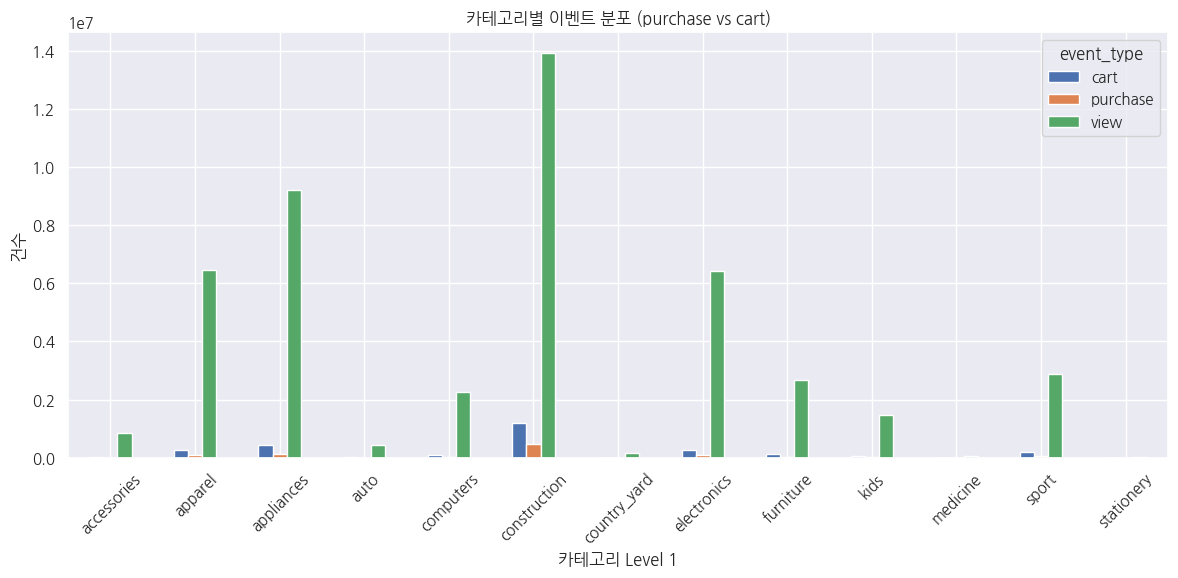

In [18]:
event_counts = df.groupby(['category_lvl1', 'event_type']).size().unstack().fillna(0)

event_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÌè¨ (purchase vs cart)")
plt.xlabel("Ïπ¥ÌÖåÍ≥†Î¶¨ Level 1")
plt.ylabel("Í±¥Ïàò")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


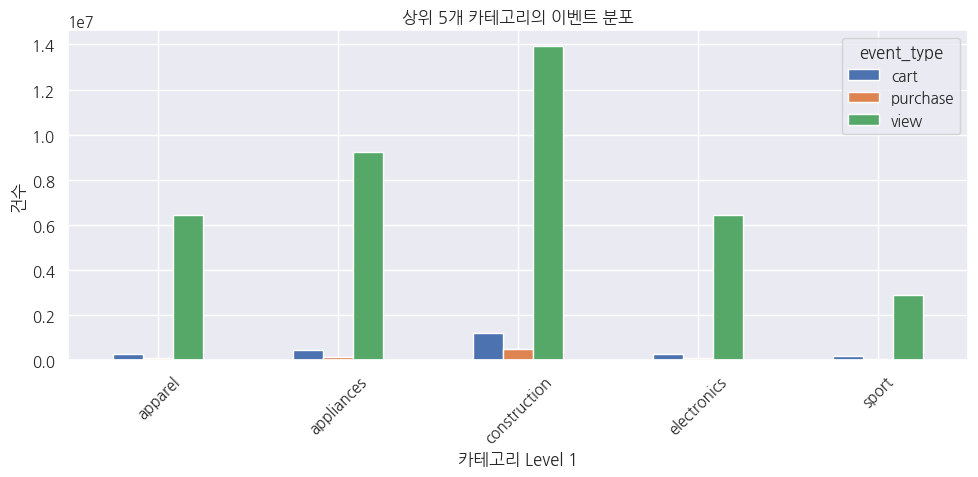

In [20]:
# "purchase" Ïù¥Î≤§Ìä∏ Í∏∞Ï§ÄÏúºÎ°úÎßå ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÑ†Ï†ï
top5_by_purchase = df[df["event_type"] == "purchase"]["category_lvl1"].value_counts().nlargest(5).index

# ÏÉÅÏúÑ 5Í∞úÎßå ÌïÑÌÑ∞ÎßÅ
top_event_counts = df[df["category_lvl1"].isin(total_event_counts)] \
    .groupby(['category_lvl1', 'event_type']) \
    .size().unstack().fillna(0)

# ÏãúÍ∞ÅÌôî
top_event_counts.plot(kind='bar', figsize=(10, 5))
plt.title("ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò Ïù¥Î≤§Ìä∏ Î∂ÑÌè¨")
plt.xlabel("Ïπ¥ÌÖåÍ≥†Î¶¨ Level 1")
plt.ylabel("Í±¥Ïàò")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌçºÎÑê Î∂ÑÏÑù (Ï°∞Ìöå ‚Üí Ïû•Î∞îÍµ¨Îãà ‚Üí Íµ¨Îß§)

In [21]:
# 1Îã®Í≥Ñ: Ïû•Î∞îÍµ¨Îãà(cart)ÏôÄ Íµ¨Îß§(purchase) Ïàò ÏßëÍ≥Ñ (df)
# Ïù¥Î≤§Ìä∏Î≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏßëÍ≥Ñ
funnel_events = df.groupby(['category_lvl1', 'event_type']).size().unstack().fillna(0)

# Ïó¥ Ïù¥Î¶Ñ ÎßûÏ∂∞Ï§å
funnel_events = funnel_events.rename(columns={
    "cart": "cart_count",
    "purchase": "purchase_count"
})

In [22]:
# 2Îã®Í≥Ñ: Ï°∞Ìöå(view) Ïàò Ï∂îÍ∞Ä (df_monthly_views ‚Üí Ìï©ÏÇ∞)
# ÏõîÎ≥Ñ view ÏàòÎ•º Ïπ¥ÌÖåÍ≥†Î¶¨Î≥ÑÎ°ú Ìï©ÏÇ∞
view_total = df_monthly_views.sum(axis=1).rename("view_count")

# ÌçºÎÑê Îç∞Ïù¥ÌÑ∞ÏôÄ Î≥ëÌï©
funnel_df = pd.concat([view_total, funnel_events], axis=1).fillna(0).astype(int)

# ÌôïÏù∏
print(funnel_df.head())

               view_count  cart_count  purchase_count     view
category_lvl1                                                 
accessories       4075615       23864            6366   837794
apparel          33522115      271655           82312  6440786
appliances       49863633      430336          142468  9220722
auto              4135966       18510            6662   448558
computers        16582152       83221           29443  2248202


| ÌùêÎ¶Ñ                  | Ìï¥ÏÑù                             |
| ------------------- | ------------------------------ |
| View ÎßéÍ≥† Cart Ï†ÅÏùå     | Í¥ÄÏã¨ÏùÄ ÎßéÏßÄÎßå Ïû•Î∞îÍµ¨Îãà ÏßÑÏûÖÎ•† ÎÇÆÏùå ‚Üí ÏßÑÏûÖ Ïú†ÎèÑ ÌïÑÏöî |
| Cart ÎßéÍ≥† Purchase ÎÇÆÏùå | Ïû•Î∞îÍµ¨Îãà Ïù¥ÌÉàÎ•† ÎÜíÏùå ‚Üí ÌîÑÎ°úÎ™®ÏÖò, UX Í∞úÏÑ† ÌïÑÏöî   |
| Purchase ÎπÑÏú® ÎÜíÏùå      | Ï†ÑÌôòÏú® Ï¢ãÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨ ‚Üí ÏßëÏ§ë ÌîÑÎ°úÎ™®ÏÖò Í∞ÄÎä•       |

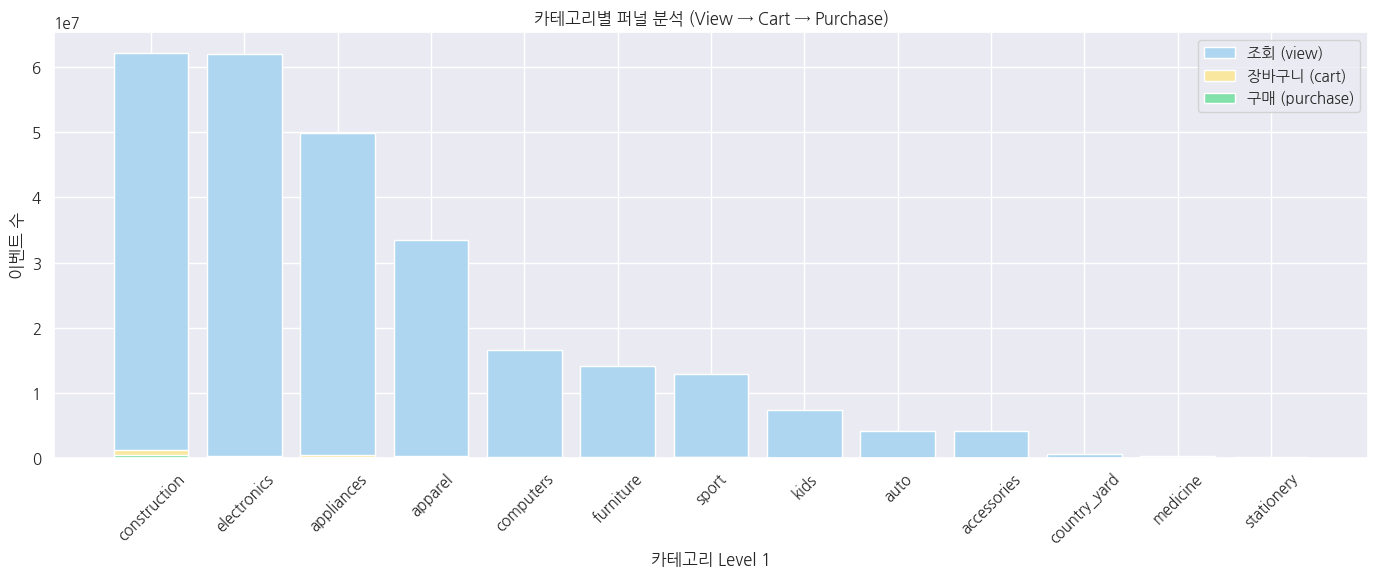

In [23]:
# 3Îã®Í≥Ñ: ÌçºÎÑê ÏãúÍ∞ÅÌôî

funnel_df_sorted = funnel_df.sort_values("view_count", ascending=False)

plt.figure(figsize=(14, 6))
x = funnel_df_sorted.index

plt.bar(x, funnel_df_sorted["view_count"], label="Ï°∞Ìöå (view)", color="#AED6F1")
plt.bar(x, funnel_df_sorted["cart_count"], label="Ïû•Î∞îÍµ¨Îãà (cart)", color="#F9E79F")
plt.bar(x, funnel_df_sorted["purchase_count"], label="Íµ¨Îß§ (purchase)", color="#82E0AA")

plt.title("Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌçºÎÑê Î∂ÑÏÑù (View ‚Üí Cart ‚Üí Purchase)")
plt.xlabel("Ïπ¥ÌÖåÍ≥†Î¶¨ Level 1")
plt.ylabel("Ïù¥Î≤§Ìä∏ Ïàò")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Ï†ÑÌôòÏú® ÌôïÏù∏

In [24]:
# Ï†ÑÌôòÏú® Î≥¥Í∏∞
funnel_df["view_to_cart"] = (funnel_df["cart_count"] / funnel_df["view_count"]).round(3)
funnel_df["cart_to_purchase"] = (funnel_df["purchase_count"] / funnel_df["cart_count"]).round(3)

print(funnel_df[["view_to_cart", "cart_to_purchase"]].sort_values("cart_to_purchase", ascending=False).head())

               view_to_cart  cart_to_purchase
category_lvl1                                
construction          0.019             0.395
auto                  0.004             0.360
computers             0.005             0.354
electronics           0.004             0.341
appliances            0.009             0.331


In [25]:
funnel_df["view_to_cart"] = (funnel_df["cart_count"] / funnel_df["view_count"]).fillna(0)
funnel_df["cart_to_purchase"] = (funnel_df["purchase_count"] / funnel_df["cart_count"]).fillna(0)

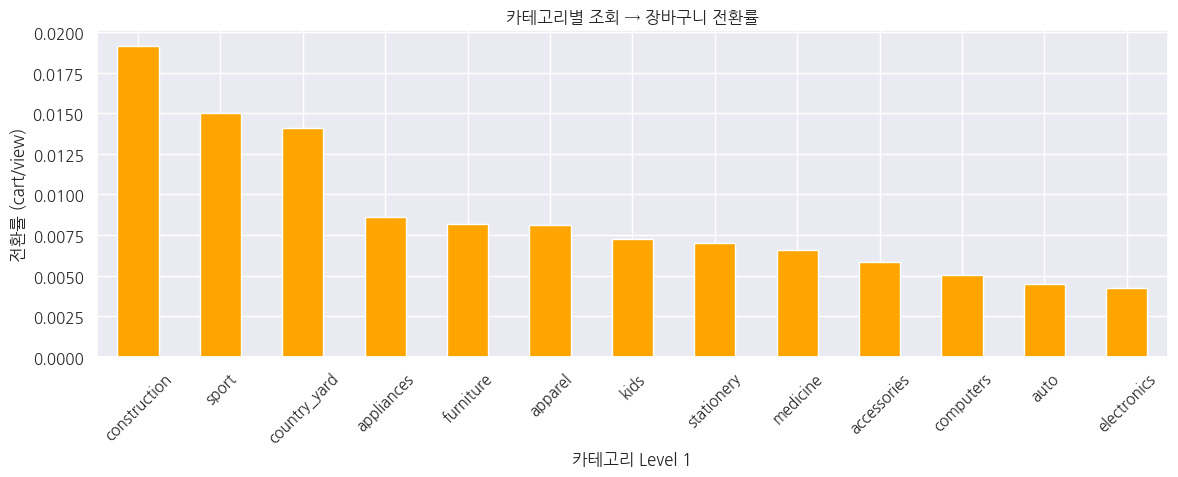

In [26]:
funnel_df.sort_values("view_to_cart", ascending=False)["view_to_cart"].plot(
    kind="bar", figsize=(12,5), color="orange"
)
plt.title("Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï°∞Ìöå ‚Üí Ïû•Î∞îÍµ¨Îãà Ï†ÑÌôòÎ•†")
plt.ylabel("Ï†ÑÌôòÎ•† (cart/view)")
plt.xlabel("Ïπ¥ÌÖåÍ≥†Î¶¨ Level 1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


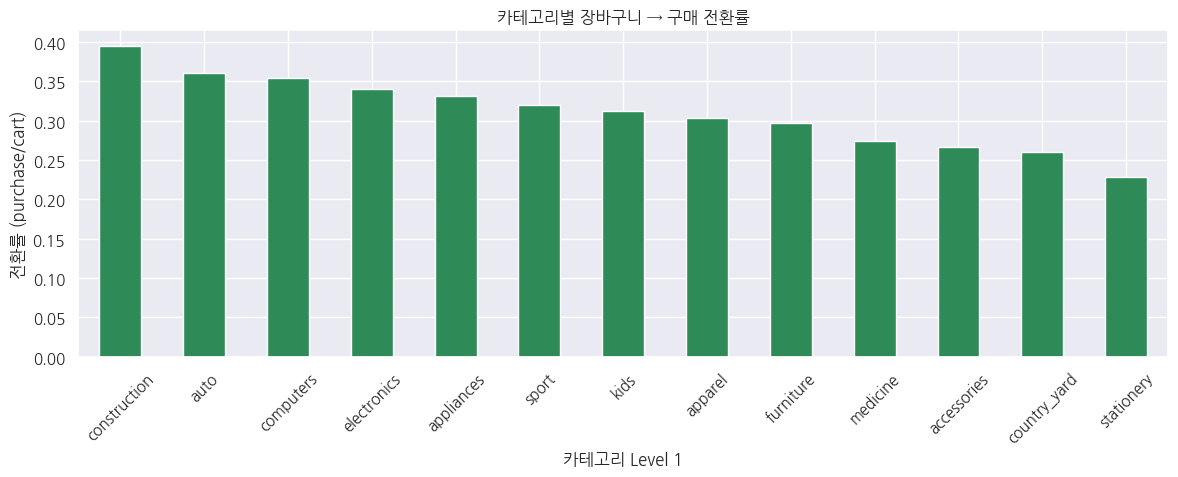

In [27]:
funnel_df.sort_values("cart_to_purchase", ascending=False)["cart_to_purchase"].plot(
    kind="bar", figsize=(12,5), color="seagreen"
)
plt.title("Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ïû•Î∞îÍµ¨Îãà ‚Üí Íµ¨Îß§ Ï†ÑÌôòÎ•†")
plt.ylabel("Ï†ÑÌôòÎ•† (purchase/cart)")
plt.xlabel("Ïπ¥ÌÖåÍ≥†Î¶¨ Level 1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ïπ¥ÌÖåÍ≥†Î¶¨ Level 2Î≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© ÎπÑÍµê

In [31]:
# category_lvl2Î≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Î∞è Íµ¨Îß§ Ïàò
mean_price = df.groupby("category_lvl2")["price"].mean()
purchase_count = df[df["event_type"] == "purchase"].groupby("category_lvl2").size()
lvl2_to_lvl1 = df.groupby("category_lvl2")["category_lvl1"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# ÌÜµÌï©
price_purchase_df = pd.concat([mean_price, purchase_count.rename("purchase_count"), lvl2_to_lvl1.rename("category_lvl1")], axis=1).fillna(0)

# Ï†ïÏàò Ï≤òÎ¶¨
price_purchase_df["purchase_count"] = price_purchase_df["purchase_count"].astype(int)

In [34]:
top5_lvl2_per_lvl1 = (
    price_purchase_df
    .sort_values(["category_lvl1", "purchase_count"], ascending=[True, False])
    .groupby("category_lvl1")
    .head(5)
)

top5_lvl2_per_lvl1["label"] = top5_lvl2_per_lvl1["category_lvl1"] + " > " + top5_lvl2_per_lvl1.index

/tmp/ipython-input-36-503196996.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x_labels, rotation=45, ha="right")


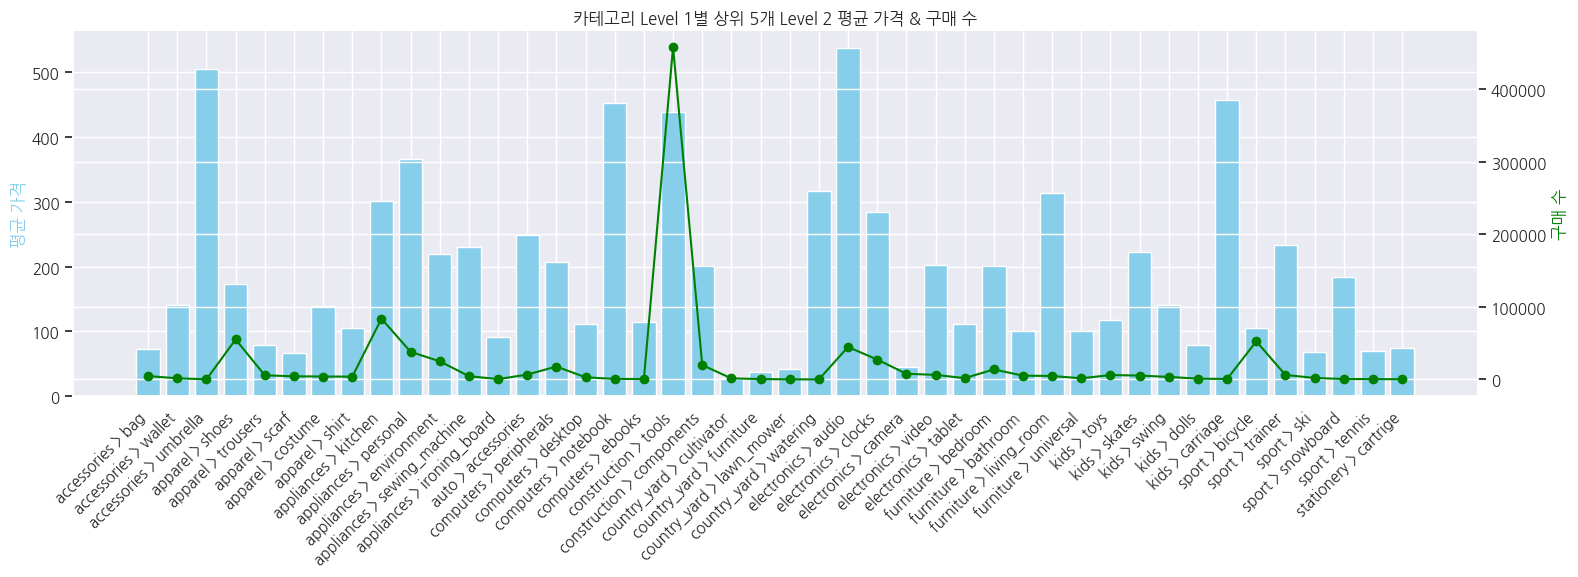

In [36]:
fig, ax1 = plt.subplots(figsize=(16, 6))

x_labels = top5_lvl2_per_lvl1["label"]

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ
ax1.bar(x_labels, top5_lvl2_per_lvl1["price"], color="skyblue", label="ÌèâÍ∑† Í∞ÄÍ≤©")
ax1.set_ylabel("ÌèâÍ∑† Í∞ÄÍ≤©", color="skyblue")
ax1.set_xticklabels(x_labels, rotation=45, ha="right")

# ÏÑ† Í∑∏ÎûòÌîÑ
ax2 = ax1.twinx()
ax2.plot(x_labels, top5_lvl2_per_lvl1["purchase_count"], color="green", marker='o', label="Íµ¨Îß§ Ïàò")
ax2.set_ylabel("Íµ¨Îß§ Ïàò", color="green")

plt.title("Ïπ¥ÌÖåÍ≥†Î¶¨ Level 1Î≥Ñ ÏÉÅÏúÑ 5Í∞ú Level 2 ÌèâÍ∑† Í∞ÄÍ≤© & Íµ¨Îß§ Ïàò")
fig.tight_layout()
plt.show()

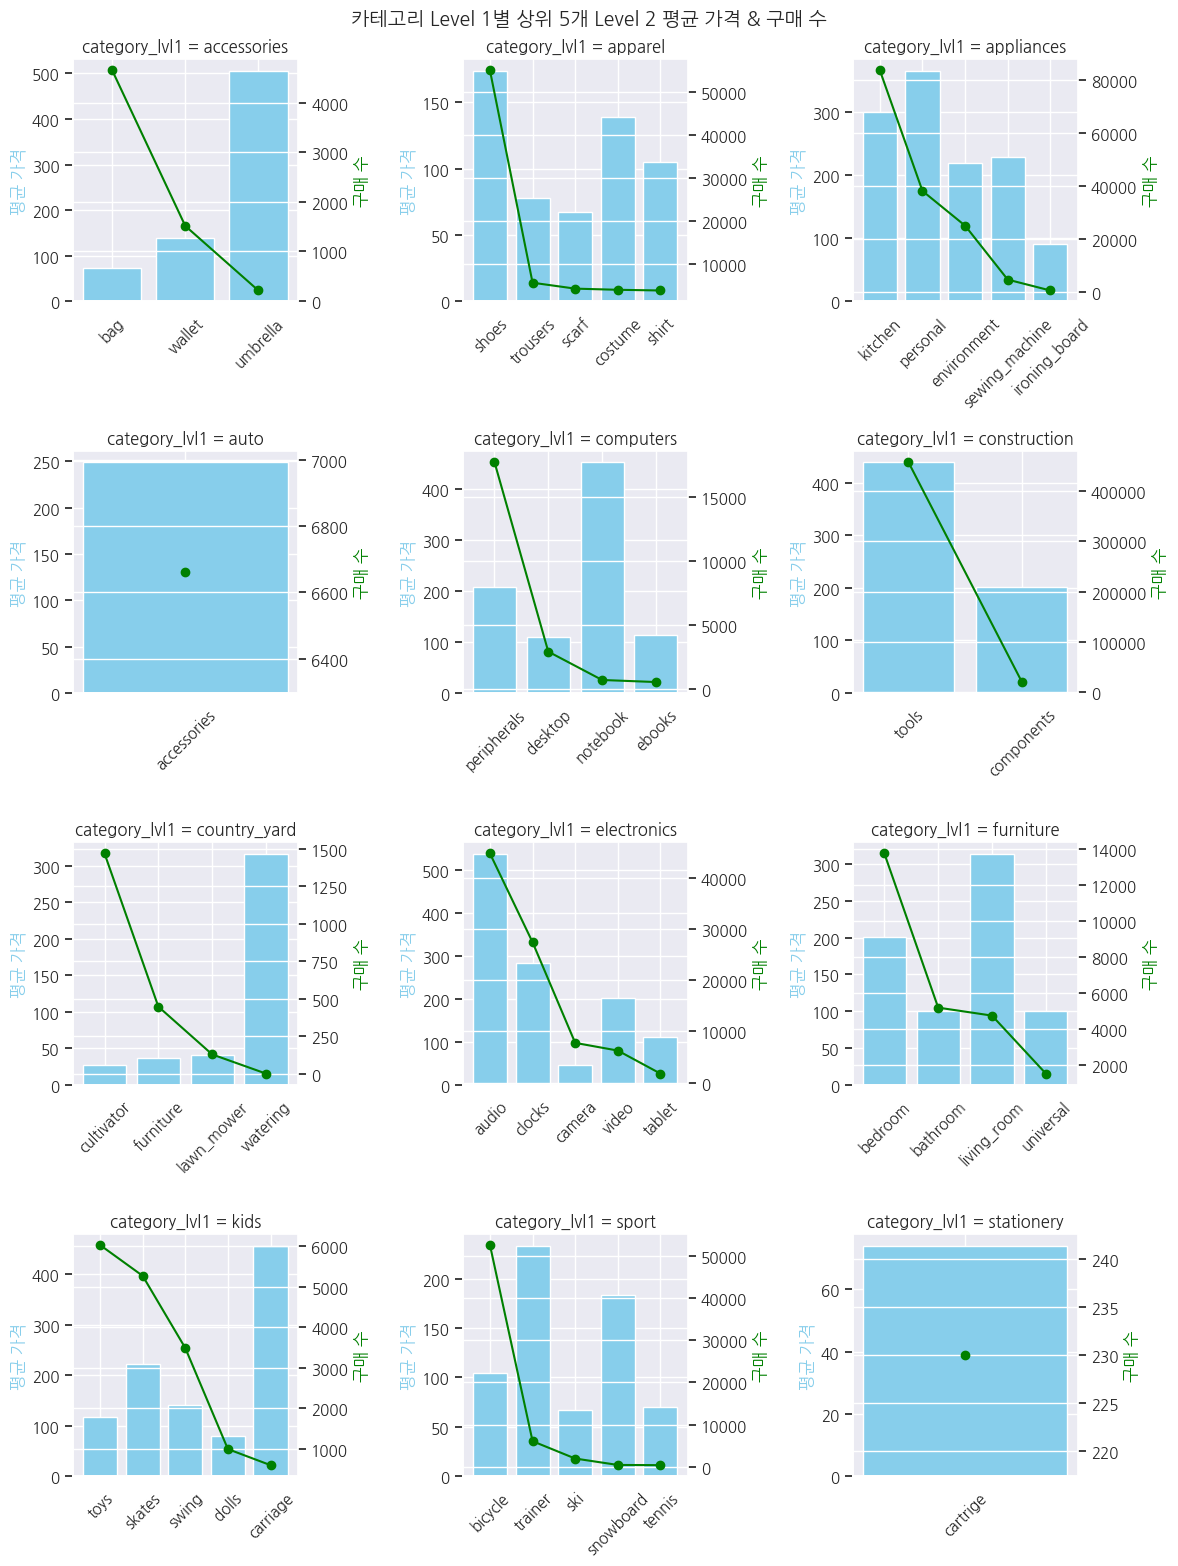

In [49]:
# FacetGrid ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
plot_df = top5_lvl2_per_lvl1.copy()
plot_df["category_lvl2"] = plot_df.index  # index Î≥µÏõê

# Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨ Î†àÎ≤®1Î≥ÑÎ°ú ÌèâÍ∑† Í∞ÄÍ≤© & Íµ¨Îß§ Ïàò Í∑∏Î¶¨Í∏∞ (ÎßâÎåÄ + ÏÑ†)
g = sns.FacetGrid(plot_df, col="category_lvl1", col_wrap=3, height=4, sharex=False, sharey=False)

def dual_axis_bar_line(data, color, **kwargs):
    ax = plt.gca()
    ax2 = ax.twinx()

    # ÎßâÎåÄÍ∑∏ÎûòÌîÑ: ÌèâÍ∑† Í∞ÄÍ≤©
    ax.bar(data["category_lvl2"], data["price"], color="skyblue", label="ÌèâÍ∑† Í∞ÄÍ≤©")
    ax.set_ylabel("ÌèâÍ∑† Í∞ÄÍ≤©", color="skyblue")
    ax.tick_params(axis='x', rotation=45)

    # ÏÑ†Í∑∏ÎûòÌîÑ: Íµ¨Îß§ Ïàò
    ax2.plot(data["category_lvl2"], data["purchase_count"], color="green", marker='o', label="Íµ¨Îß§ Ïàò")
    ax2.set_ylabel("Íµ¨Îß§ Ïàò", color="green")

g.map_dataframe(dual_axis_bar_line)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Ïπ¥ÌÖåÍ≥†Î¶¨ Level 1Î≥Ñ ÏÉÅÏúÑ 5Í∞ú Level 2 ÌèâÍ∑† Í∞ÄÍ≤© & Íµ¨Îß§ Ïàò", fontsize=14)
plt.tight_layout()
plt.show()

In [51]:
# Ïù∏Îç±Ïä§ Î≥µÏõê (category_lvl2Í∞Ä Ïù∏Îç±Ïä§Ïùº Í≤ΩÏö∞)
top5_lvl2_per_lvl1 = top5_lvl2_per_lvl1.reset_index()

# Ïπ¥ÌÖåÍ≥†Î¶¨ lvl1Î≥Ñ category_lvl2 Ï¢ÖÎ•ò Ïàò ÌôïÏù∏
lvl2_counts = top5_lvl2_per_lvl1.groupby("category_lvl1")["category_lvl2"].nunique().reset_index()
lvl2_counts.columns = ["category_lvl1", "num_of_lvl2"]

# 5Í∞ú ÎØ∏ÎßåÏù∏ Ïπ¥ÌÖåÍ≥†Î¶¨ ÌôïÏù∏
few_categories = lvl2_counts[lvl2_counts["num_of_lvl2"] < 5]
print("‚ö†Ô∏è Level 2Í∞Ä 5Í∞ú ÎØ∏ÎßåÏù∏ Level 1 Ïπ¥ÌÖåÍ≥†Î¶¨Îì§:")
print(few_categories)

‚ö†Ô∏è Level 2Í∞Ä 5Í∞ú ÎØ∏ÎßåÏù∏ Level 1 Ïπ¥ÌÖåÍ≥†Î¶¨Îì§:
   category_lvl1  num_of_lvl2
0    accessories            3
3           auto            1
4      computers            4
5   construction            2
6   country_yard            4
8      furniture            4
11    stationery            1


In [45]:
# 1. Ïù∏Îç±Ïä§ Î¨∏Ï†ú Î∞©ÏßÄ
price_purchase_df = price_purchase_df.reset_index(drop=True)

# 2. Ï†ïÎ†¨
price_purchase_df_sorted = price_purchase_df.sort_values(
    by=["category_lvl1", "purchase_count"],
    ascending=[True, False]
)

# 3. Í∑∏Î£πÎ≥Ñ Ï∂úÎ†•
grouped = price_purchase_df_sorted.groupby("category_lvl1")

for lvl1, group in grouped:
    print(f"\nüìÇ {lvl1}")
    display(group[["category_lvl2", "price", "purchase_count"]])



üìÇ accessories


category_lvl2       price  purchase_count
2            bag   72.869629            4653
59        wallet  140.223720            1509
55      umbrella  505.455536             204


üìÇ apparel


category_lvl2       price  purchase_count
38         shoes  173.469817           55118
53      trousers   78.162966            5654
35         scarf   67.123630            4275
12       costume  138.563682            4006
37         shirt  105.029116            3844
39        shorts  566.916863            3618
56     underwear  252.186683            2634
54        tshirt  138.103821            1296
26         jeans  101.225294             552
45          sock   96.947409             358
32       pajamas  109.946339             352
22         glove   72.605585             310
27        jumper  179.275069             200
42         skirt  207.255468              56
25        jacket   51.537860              31
17         dress   31.961164               8
5           belt   43.157458               0


üìÇ appliances


category_lvl2       price  purchase_count
28         kitchen  300.417508           83764
34        personal  365.738355           38076
19     environment  219.617842           24939
36  sewing_machine  229.856038            4510
24   ironing_board   91.129814             391
23            iron  105.189985               8


üìÇ auto


category_lvl2       price  purchase_count
0   accessories  248.921774            6662


üìÇ computers


category_lvl2       price  purchase_count
33   peripherals  207.232636           17732
14       desktop  110.540183            2899
31      notebook  452.043533             682
18        ebooks  114.100546             521


üìÇ construction


category_lvl2       price  purchase_count
50         tools  438.182716          458585
11    components  201.406128           19799


üìÇ country_yard


category_lvl2       price  purchase_count
13    cultivator   27.519242            1470
21     furniture   37.117533             447
29    lawn_mower   40.974491             128
60      watering  316.510000               0


üìÇ electronics


category_lvl2       price  purchase_count
1          audio  537.784946           44744
10        clocks  283.537465           27411
7         camera   45.423735            7765
58         video  201.948152            6262
47        tablet  111.050102            1768
48     telephone  207.040177             750
43    smartphone  316.743477             301


üìÇ furniture


category_lvl2       price  purchase_count
4        bedroom  201.361000           13747
3       bathroom  100.289018            5182
30   living_room  313.976273            4738
57     universal  100.721108            1517


üìÇ kids


category_lvl2       price  purchase_count
51          toys  117.343520            6032
40        skates  222.277282            5272
46         swing  141.080415            3492
16         dolls   78.511664             998
8       carriage  456.516635             602
20          fmcg   81.807219             143


üìÇ sport


category_lvl2       price  purchase_count
6        bicycle  104.726984           52482
52       trainer  233.533905            6121
41           ski   67.286982            2023
44     snowboard  183.425409             510
49        tennis   69.614793             461
15        diving  306.894743              27


üìÇ stationery


category_lvl2      price  purchase_count
9      cartrige  74.130322             230

In [48]:
# 1. Ïù∏Îç±Ïä§Ïóê category_lvl2Í∞Ä ÏûàÎã§Î©¥ Î≥µÏõê
if "category_lvl2" not in price_purchase_df.columns:
    price_purchase_df = price_purchase_df.reset_index()

# 2. Ï†ïÎ†¨: ÎåÄÎ∂ÑÎ•ò > Íµ¨Îß§ Ïàò ÎÇ¥Î¶ºÏ∞®Ïàú
price_purchase_df_sorted = price_purchase_df.sort_values(
    by=["category_lvl1", "purchase_count"],
    ascending=[True, False]
)

# 3. Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†• ÏòµÏÖò
import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", None)

# 4. Ï∂úÎ†•
print(price_purchase_df_sorted[["category_lvl1", "category_lvl2", "price", "purchase_count"]])


   category_lvl1   category_lvl2       price  purchase_count
2    accessories             bag   72.869629            4653
59   accessories          wallet  140.223720            1509
55   accessories        umbrella  505.455536             204
38       apparel           shoes  173.469817           55118
53       apparel        trousers   78.162966            5654
35       apparel           scarf   67.123630            4275
12       apparel         costume  138.563682            4006
37       apparel           shirt  105.029116            3844
39       apparel          shorts  566.916863            3618
56       apparel       underwear  252.186683            2634
54       apparel          tshirt  138.103821            1296
26       apparel           jeans  101.225294             552
45       apparel            sock   96.947409             358
32       apparel         pajamas  109.946339             352
22       apparel           glove   72.605585             310
27       apparel        

# Ï†ÑÎûµ ÏöîÏïΩ
| Î∂ÑÏÑù Í∏∞Î≤ï          | ÌòÑÏû¨ Î∂ÑÏÑù Ïó∞Í≤∞                       | ÎßàÏºÄÌåÖ ÌôúÏö©                   |
| -------------- | ------------------------------ | ------------------------ |
| AARRR          | ÌçºÎÑê Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞ò                      | Ï†ÑÌôòÏú® ÏßÑÎã®, UI Í∞úÏÑ†, ÎßàÏºÄÌåÖ ÌÉÄÍ≤ü ÏÑ§Ï†ï |
| ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù         | Ïú†Ï†ÄÎ≥Ñ Ï≤´ Î∞©Î¨∏ ÏãúÏ†ê                    | Ïû•Í∏∞ Ïú†ÏßÄÏú®, Í≥†Í∞ù ÏÉùÏï†Í∞ÄÏπò, Ïù¥ÌÉà ÏòàÏ∏°   |
| ÌçºÎÑê Î∂ÑÏÑù          | view ‚Üí cart ‚Üí purchase         | Ïπ¥ÌÖåÍ≥†Î¶¨/Î∏åÎûúÎìú/Í∞ÄÍ≤©Î≥Ñ Í∞úÏÑ† Ìè¨Ïù∏Ìä∏      |
| ÏÑ∏Í∑∏Î®ºÌä∏ Î∂ÑÏÑù        | Ïú†Ï†Ä ÌñâÎèô Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ                 | Î¶¨ÎßàÏºÄÌåÖ, ÌÉÄÍ≤ü ÏÑ∏Î∂ÑÌôî             |
| RFM Î∂ÑÏÑù (Ï∂îÍ∞Ä Í∞ÄÎä•) | Recency / Frequency / Monetary | Ï∂©ÏÑ± Ïú†Ï†Ä ÏãùÎ≥Ñ, CRM Ï†ÑÎûµ         |

# RFM Î∂ÑÏÑùÍ≥º Ïó∞Í≤∞ÌïòÍ∏∞
- Í≥†Í∞ùÏùÑ ÏÑ∏ Í∞ÄÏßÄ ÏßÄÌëúÎ°ú ÎÇòÎàÑÏñ¥ Ï∂©ÏÑ±ÎèÑ Í∏∞Î∞ò ÏÑ∏Í∑∏Î®ºÌä∏Î•º ÌååÏïÖÌïòÎäî ÎåÄÌëúÏ†ÅÏù∏ ÎßàÏºÄÌåÖ Í∏∞Î≤ï

| Ìï≠Î™©                | ÏùòÎØ∏                  | Í≥ÑÏÇ∞ Í∏∞Ï§Ä         |
| ----------------- | ------------------- | ------------- |
| **Recency (R)**   | ÎßàÏßÄÎßâ Íµ¨Îß§ÏùºÎ°úÎ∂ÄÌÑ∞ ÏñºÎßàÎÇò ÏßÄÎÇ¨ÎäîÍ∞Ä | ÏµúÍ∑ºÏùº - ÎßàÏßÄÎßâ Íµ¨Îß§Ïùº |
| **Frequency (F)** | ÏñºÎßàÎÇò ÏûêÏ£º Íµ¨Îß§ÌñàÎäîÍ∞Ä        | Íµ¨Îß§ ÌöüÏàò         |
| **Monetary (M)**  | ÏñºÎßàÎÇò ÎßéÏù¥ ÏçºÎäîÍ∞Ä          | Ï¥ù ÏßÄÏ∂ú Í∏àÏï°       |



In [57]:
# 1. Íµ¨Îß§ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
df_purchase = df[df["event_type"] == "purchase"].copy()

# 2. ÎÇ†Ïßú Ï†ïÎ¶¨
df_purchase["event_time"] = pd.to_datetime(df_purchase["event_time"]).dt.tz_localize(None)

# 3. Í∏∞Ï§ÄÏùº ÏÑ§Ï†ï (Ïòà: Í∞ÄÏû• ÎßàÏßÄÎßâ Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä)
snapshot_date = df_purchase["event_time"].max() + pd.Timedelta(days=1)

# 4. RFM Í≥ÑÏÇ∞
rfm = df_purchase.groupby("user_id").agg({
    "event_time": lambda x: (snapshot_date - x.max()).days,   # Recency
    "user_id": "count",                                       # Frequency
    "price": "sum"                                            # Monetary
})

rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm = rfm.reset_index()
rfm

user_id  Recency  Frequency  Monetary
0       128029678       12          1    181.73
1       128968633       25          1    355.22
2       192078182       21          1    110.72
3       229414998       10          1    450.20
4       237973968       14          2    589.18
...           ...      ...        ...       ...
453482  635148377        1          2    709.65
453483  635148505        1          1    167.29
453484  635153043        1          1    763.21
453485  635158569        1          4   1777.66
453486  635165435        1          1    319.41

[453487 rows x 4 columns]

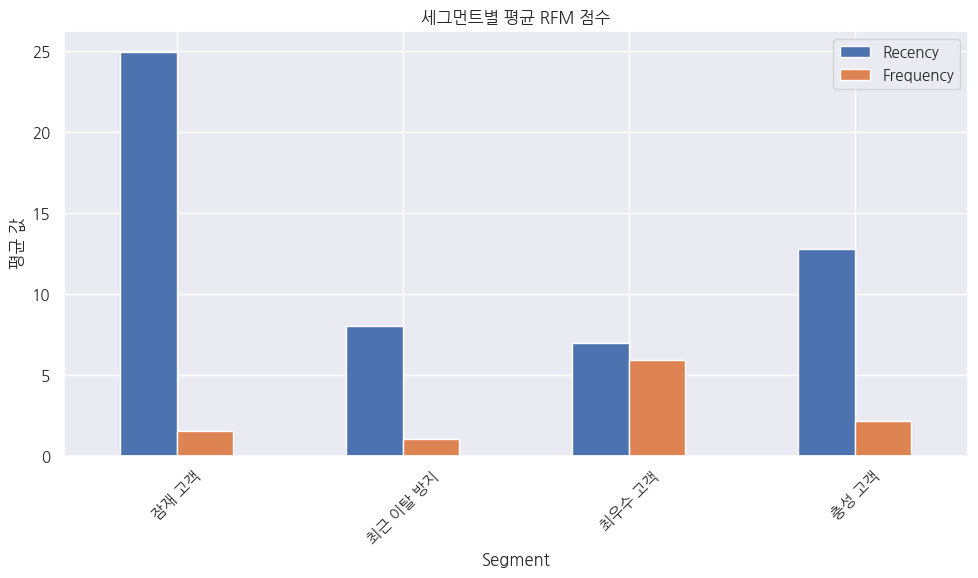

In [65]:
# ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ R, F, M ÌèâÍ∑†Í∞í ÎπÑÍµê
rfm_avg = rfm.groupby("Segment")[["Recency", "Frequency", "Monetary"]].mean()

rfm_avg.plot(kind="bar", figsize=(10, 6))
plt.title("ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÌèâÍ∑† RFM Ï†êÏàò")
plt.ylabel("ÌèâÍ∑† Í∞í")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
# 1Ïù¥ Í∞ÄÏû• ÏµúÍ∑º/ÎπàÎ≤à/Í≥†Ïï°
rfm["R_score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm["M_score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])

# ÏµúÏ¢Ö RFM Ïä§ÏΩîÏñ¥ Ï°∞Ìï©
rfm["RFM_Score"] = rfm["R_score"].astype(str) + rfm["F_score"].astype(str) + rfm["M_score"].astype(str)

In [59]:
def segment(r, f, m):
    if r >= 4 and f >= 4 and m >= 4:
        return "ÏµúÏö∞Ïàò Í≥†Í∞ù"
    elif r >= 3 and f >= 3:
        return "Ï∂©ÏÑ± Í≥†Í∞ù"
    elif r >= 4:
        return "ÏµúÍ∑º Ïù¥ÌÉà Î∞©ÏßÄ"
    else:
        return "Ïû†Ïû¨ Í≥†Í∞ù"

rfm["Segment"] = rfm[["R_score", "F_score", "M_score"]].astype(int).apply(lambda x: segment(*x), axis=1)


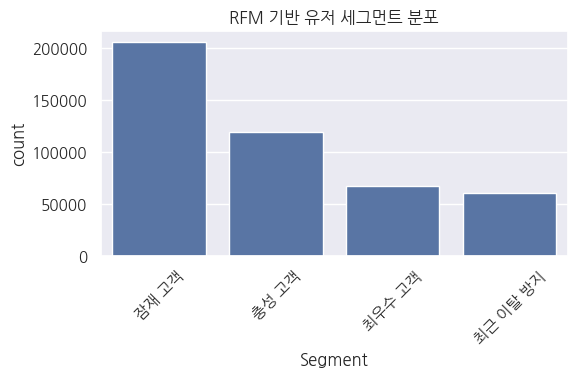

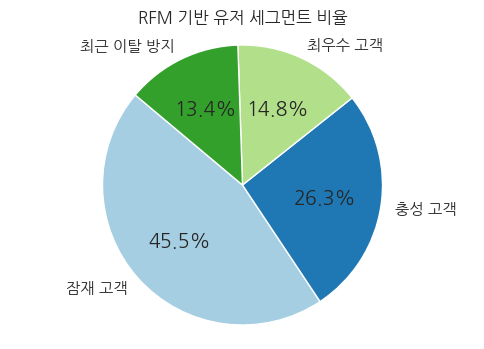

In [63]:
plt.figure(figsize=(6,4))
sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index)
plt.title("RFM Í∏∞Î∞ò Ïú†Ï†Ä ÏÑ∏Í∑∏Î®ºÌä∏ Î∂ÑÌè¨")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

rfm_seg_counts = rfm["Segment"].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(
    rfm_seg_counts,
    labels=rfm_seg_counts.index,
    autopct="%.1f%%",
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("RFM Í∏∞Î∞ò Ïú†Ï†Ä ÏÑ∏Í∑∏Î®ºÌä∏ ÎπÑÏú®")
plt.axis("equal")
plt.show()

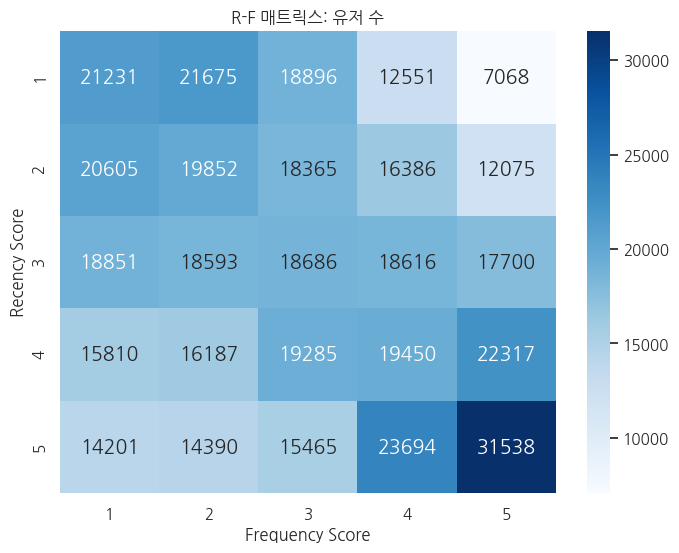

In [66]:
# R, F Ï†êÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú 1~5Î°ú ÎÇòÎàà Îã§Ïùå ÍµêÏ∞®Ìëú ÏÉùÏÑ±
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=range(5, 0, -1)).astype(int)
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=range(1, 6)).astype(int)

rf_matrix = rfm.pivot_table(index="R_Score", columns="F_Score", values="user_id", aggfunc="count")

plt.figure(figsize=(8, 6))
sns.heatmap(rf_matrix, annot=True, fmt=".0f", cmap="Blues")
plt.title("R-F Îß§Ìä∏Î¶≠Ïä§: Ïú†Ï†Ä Ïàò")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.show()


- Ïò§Î•∏Ï™Ω ÏïÑÎûò (R=5, F=5):

31538Î™Ö ‚Üí ÏµúÍ∑ºÏóê Î∞©Î¨∏ÌñàÍ≥†, Îß§Ïö∞ ÏûêÏ£º Î∞©Î¨∏ÌïòÎäî ÌïµÏã¨ VIP Í≥†Í∞ù

Í∞ÄÏû• Í∞ÄÏπò ÏûàÎäî Í≥†Í∞ùÏ∏µÏúºÎ°ú ÏßëÏ§ëÏ†ÅÏù∏ Î¶¨ÌÖêÏÖò Ï†ÑÎûµ ÌïÑÏöî

- ÏôºÏ™Ω ÏúÑ (R=1, F=1):

21231Î™Ö ‚Üí Ïò§ÎûòÏ†ÑÏóê ÌïúÎ≤à Î∞©Î¨∏ÌñàÎçò Í≥†Í∞ù

Ïù¥ÌÉàÌïú Ïú†Ï†ÄÏùº ÌôïÎ•† ÎÜíÏùå ‚Üí Ïû¨ÌôúÏÑ±Ìôî Ï∫†ÌéòÏù∏ ÌïÑÏöî

- Ï§ëÏïô (R=3, F=3):

18686Î™Ö ‚Üí ÌôúÎèôÏùÄ ÌïòÎÇò ÏµúÍ∑ºÏÑ±ÎèÑ ÎπàÎèÑÎèÑ Ï§ëÍ∞Ñ

ÏÑ±Ïû• Í∞ÄÎä• Í≥†Í∞ùÍµ∞, ÏßÄÏÜçÏ†ÅÏù∏ ÏºÄÏñ¥ ÌïÑÏöî

--> Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏ Í∏∞Î∞ò ÌÉÄÍ≤ü ÎßàÏºÄÌåÖÏù¥ÎÇò CRM Ï†ÑÎûµ ÏàòÎ¶ΩÏóê Îß§Ïö∞ Ïú†Ïö©


| ÏòÅÏó≠         | Ï†ÑÎûµ Ï†úÏïà                                                        |
|--------------|------------------------------------------------------------------|
| Retention    | (R=4-5, F=1-2) ÏµúÍ∑ºÏóê Ìïú Î≤àÎßå Ïò® Í≥†Í∞ù ‚Üí Îã§Ïãú Î∞©Î¨∏ Ïú†ÎèÑ (ÏïåÎ¶º, Ïø†Ìè∞) |
| Revenue      | (R=4-5, F=4-5) VIP Í≥†Í∞ù ‚Üí ÏóÖÏÖÄÎßÅ, Î©§Î≤ÑÏã≠ Ïú†ÎèÑ                     |
| Reactivation | (R=1-2, F=3-5) ÏûêÏ£º ÏôîÏßÄÎßå ÏµúÍ∑ºÏóê Ïïà Ïò® Í≥†Í∞ù ‚Üí Î¶¨ÎßàÏù∏Îçî, ÌÉÄÍ≤ü Î©îÏùº   |
| Referral     | (R=5, F=5) Ï∂îÏ≤ú Ïú†ÎèÑ, Î¶¨Î∑∞ ÏöîÏ≤≠                                  |
